In [267]:
import pandas as pd
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

In [84]:

field_prod_data_path = '../data/CNS_Field_Production.csv'
cns_gas_train_data_path = '../data/CNS_gas_train.csv'
cns_oil_data_path = '../data/CNS oil.csv'
cns_rock_samples_path = '../data/CNS rock samples.csv'
field_prod_data = pd.read_csv(field_prod_data_path)
field_prod_data

,X,Y,OBJECTID,FIELDNAME,FIELDAREA,ORGGRPNM,UNITNAME,UNITTYPCOD,UNITTYPDES,LOCATION,PERIODDATE,PERIODYRMN,PERIODMNTH,PERIODMNNM,PERIODYR,OILPRODMAS,OILPRODM3,OILPRDDENS,OILPRODMBD,DGASPRODMA,DGASPROKSM,DGASPROMMS,DGASPRODEN,AGASPRODMA,AGASPROMMS,AGASPROKSM,AGASPRODEN,GCONDMASS,GCONDVOL,GCONDMBD,GCONDDEN,INJWATMASS,INJWATVOL,INJWATMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,WELLREGNO
0,1.114562,58.231419,3001,BALMORAL,CNS,PREMIER OIL PLC,BALMORAL,P,Oil Field Exporting to Pipeline,Offshore,2017-03-15T00:00:00.000Z,201703,3,March,2017,2730.3966,3294.0,828.9,0.668363,NaN,NaN,NaN,NaN,56.112,0.063795,56.0,1.002,NaN,NaN,NaN,NaN,0.0,0.0,0.0,48163.0,48163.0,9.772428,110/15a-L12
1,1.114562,58.231419,3002,BALMORAL,CNS,PREMIER OIL PLC,BALMORAL,P,Oil Field Exporting to Pipeline,Offshore,2017-04-15T00:00:00.000Z,201704,4,April,2017,2730.3966,3294.0,828.9,0.690642,NaN,NaN,NaN,NaN,56.112,0.065921,56.0,1.002,NaN,NaN,NaN,NaN,0.0,0.0,0.0,48163.0,48163.0,10.098176,110/15a-L12Z
2,1.114562,58.231419,3003,BALMORAL,CNS,PREMIER OIL PLC,BALMORAL,P,Oil Field Exporting to Pipeline,Offshore,2017-05-15T00:00:00.000Z,201705,5,May,2017,2509.0128,3024.0,829.7,0.613579,NaN,NaN,NaN,NaN,49.500,0.056960,50.0,0.990,NaN,NaN,NaN,NaN,0.0,0.0,0.0,46033.0,46033.0,9.340244,110/15-L10
3,1.114562,58.231419,3004,BALMORAL,CNS,PREMIER OIL PLC,BALMORAL,P,Oil Field Exporting to Pipeline,Offshore,2017-06-15T00:00:00.000Z,201706,6,June,2017,259.0875,315.0,822.5,0.066045,NaN,NaN,NaN,NaN,5.892,0.007063,6.0,0.982,NaN,NaN,NaN,NaN,0.0,0.0,0.0,4896.0,4896.0,1.026528,110/15-L10Y
4,1.114562,58.231419,3005,BALMORAL,CNS,PREMIER OIL PLC,BALMORAL,P,Oil Field Exporting to Pipeline,Offshore,2017-07-15T00:00:00.000Z,201707,7,July,2017,0.0000,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,0.000,0.000000,0.0,0.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,110/15-L10Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12246,2.686525,56.189296,12247,DUNCAN,CNS,ENQUEST PLC,DUNCAN,P,Oil Field Exporting to Pipeline,Offshore,1990-09-15T00:00:00.000Z,199009,9,September,1990,4466.7227,5407.0,826.0,1.133668,NaN,NaN,NaN,NaN,444.752,0.725135,616.0,0.722,NaN,NaN,NaN,NaN,0.0,0.0,0.0,25845.0,25845.0,5.418835,9/24b- 1
12247,2.686525,56.189296,12248,DUNCAN,CNS,ENQUEST PLC,DUNCAN,P,Oil Field Exporting to Pipeline,Offshore,1990-10-15T00:00:00.000Z,199010,10,October,1990,4709.0440,5690.0,828.0,1.154519,NaN,NaN,NaN,NaN,256.310,0.404414,355.0,0.722,NaN,NaN,NaN,NaN,0.0,0.0,0.0,27275.0,27275.0,5.534185,28/09a-C5
12248,2.686525,56.189296,12249,DUNCAN,CNS,ENQUEST PLC,DUNCAN,P,Oil Field Exporting to Pipeline,Offshore,1990-11-15T00:00:00.000Z,199011,11,November,1990,4698.8568,5688.0,826.0,1.192584,NaN,NaN,NaN,NaN,215.878,0.351973,299.0,0.722,NaN,NaN,NaN,NaN,0.0,0.0,0.0,27419.0,27419.0,5.748850,49/30a-A5Y
12249,2.686525,56.189296,12250,DUNCAN,CNS,ENQUEST PLC,DUNCAN,P,Oil Field Exporting to Pipeline,Offshore,1990-12-15T00:00:00.000Z,199012,12,December,1990,557.2800,675.0,826.0,0.136960,NaN,NaN,NaN,NaN,23.104,0.036454,32.0,0.722,NaN,NaN,NaN,NaN,0.0,0.0,0.0,2655.0,2655.0,0.538708,30/01c- 2A


In [66]:
Counter(field_prod_data['UNITTYPDES'])

Counter({'Oil Field Exporting to Pipeline': 9329,
         'Offshore Tanker Loader': 2695,
         'Dry Gas Field': 103,
         'Onshore Oil Field': 124})

In [73]:
sum(np.isnan(field_prod_data['GCONDMASS']))

12148

In [71]:
len(set(field_prod_data['GCONDMASS']))

12181

In [40]:
field_prod_data.columns

Index(['X', 'Y', 'OBJECTID', 'FIELDNAME', 'FIELDAREA', 'ORGGRPNM', 'UNITNAME',
       'UNITTYPCOD', 'UNITTYPDES', 'LOCATION', 'PERIODDATE', 'PERIODYRMN',
       'PERIODMNTH', 'PERIODMNNM', 'PERIODYR', 'OILPRODMAS', 'OILPRODM3',
       'OILPRDDENS', 'OILPRODMBD', 'DGASPRODMA', 'DGASPROKSM', 'DGASPROMMS',
       'DGASPRODEN', 'AGASPRODMA', 'AGASPROMMS', 'AGASPROKSM', 'AGASPRODEN',
       'GCONDMASS', 'GCONDVOL', 'GCONDMBD', 'GCONDDEN', 'INJWATMASS',
       'INJWATVOL', 'INJWATMBD', 'WATPRODMAS', 'WATPRODVOL', 'WATPRODMBD',
       'WELLREGNO'],
      dtype='object')

In [501]:
cns_gas_train_data = pd.read_csv(cns_gas_train_data_path)


pd.set_option('display.max_columns', 500)
cns_gas_train_data

,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,WH_OPERATOR,WH_SPUD_DATE,WH_SPUD_YEAR,WH_COMP_DATE,WH_TD_M,WH_DR_ELEV_M,WH_DEPTH_REF,WH_WATER_DEPTH_M,SAMPLE_ID,SH_DEPTH_TOP_FT,SH_DEPTH_BOT_FT,SH_SAMPLE_TYPE,SH_SAMPLE_SUB_TYPE,SH_ORIG,SH_ORIG_DESC,SH_TREATMENT,SH_TREATMENT_DESC,SH_LITH,SH_AGE,SH_AGE_BOT,SH_FORM,SH_FORM_BOT,SH_CDATE,SH_COMMENT,SAMPLE_ID_GM,SAMPLE_ID_GDB,SAMPLE_ID_SAM,EXT_SAMPLE_VENDOR,SAMPLE_ID_EXT,GAS_METHOD,GAS_LAB,GAS_ACQ_DATE,GAS_TOTAL_CONCENTRATION,GAS_AIR,GAS_C1,GAS_C2,C2_UNSAT,GAS_C3,C3_UNSAT,GAS_IC4,GAS_NC4,C4_UNSAT,GAS_NEOC5,GAS_IC5,GAS_NC5,C5_UNSAT,GAS_NC5_PLUS,GAS_C6PLUS,GAS_O2,GAS_CO2,GAS_H2,GAS_H2S,GAS_HE,GAS_N2,D_G_METHOD,D_G_LAB,D_G_DATA_TYPE,D_G_ACQ_DATE,CSIA_CONC_C1,CSIA_NC1,CSIA_NC2,CSIA_NC3,CSIA_IC4,CSIA_NC4,CSIA_NEOC5,CSIA_IC5,CSIA_NC5,CSIA_ETHENE,CSIA_PROPENE,DC_G_CO2,DO_G_CO2,DS_G_H2S,DD_G_H2,DN_G_N2,DD_G_GAS,DD_G_NC1,DD_G_NC2,DD_G_NC3,DD_G_IC4,DD_G_NC4,DD_G_IC5,DD_G_NC5
0,NaN,Well name,Well name,Site type,Field name,Block name,Latitude,Longitude,Location CRS,Operator,Spud date,Spud year,Completion date,Target depth (m),Derrick floor elevation (m),Depth reference,Water depth (m),Sample code,Top depth in feet,Base depth in feet,Sample type,Sample origin/sub-type,Sample origin,Sample origin description,Sample treatment,Sample treatment description,Sample lithology,Sample age (top),Sample age (bottom),Formation (top),Formation (bottom),Collection date,Sample comments,Sample code GM,Sample code in GDB,Sample code in SAM,Name external data vendor,Sample code external data vendor,Method used,Laboratory,Acquisition date,Total gas concentration (ppm),Air in original sample Mol%,Methane air free Mol%,Ethane air free Mol%,C2 unsaturated air free Mol%,Propane air free Mol%,C3 unsaturated air free Mol%,Iso butane air free Mol%,Normal butane air free Mol%,C4 unsaturated air free Mol%,Neo pentane %,Iso pentane air free Mol%,Normal pentane air free Mol%,C5 unsaturated air free Mol%,C5+ fraction air free Mol%,C6+ fraction air free Mol%,Oxygen,CO2 air free Mol%,Hydrogen air free Mol%,H2S air free Mol%,HE air free Mol%,Nitrogen air free Mol%,Method used,Laboratory,Data type,Acquisition date,vol% C1,dC13 nC1,dC13 nC2,dC13 nC3,dC13 iC4,dC13 nC4,dC13 neopentane,dC13 iC5,dC13 nC5,ethene,propene,dC13 CO2,dO18 CO2,dS34 H2S,dDeuterium on H2,dN15 N2,dDeuterium total GAS,dDeuterium nC1,dDeuterium nC2,dDeuterium nC3,dDeuterium iC4,dDeuterium nC4,dDeuterium iC5,dDeuterium nC5
1,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXPRO_41219,9814,12360,Gas,Subsurface,SEPR,NaN,ASIS,NaN,NaN,NaN,NaN,SELE,NaN,30-03-16 0:00,1379-C1-F,NaN,NaN,NaN,NaN,NaN,Air corrected,ISOLAB,23-05-16 0:00,NaN,0.069,75.5,11.4,0.0019,6.1,0.0008,1,2.1,NaN,0.0085,0.51,0.53,NaN,NaN,0.5,NaN,1.8,0,0,NaN,0.56,CSIA,ISOLAB,per mil,23-05-16 0:00,NaN,-42.1,-28.8,-28.2,-29,-28.5,NaN,-28.2,-28.7,NaN,NaN,-7.7,NaN,NaN,NaN,-4,NaN,-187,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXPRO_41220,9814,12360,Gas,Subsurface,SEPR,NaN,ASIS,NaN,NaN,NaN,NaN,SELE,NaN,30-03-16 0:00,A2442,NaN,NaN,NaN,NaN,NaN,Air corrected,ISOLAB,23-05-16 0:00,NaN,0.021,75.4,11.2,0.0017,6.1,0.0007,1.1,2.2,NaN,0.0087,0.54,0.57,NaN,NaN,0.58,NaN,1.8,0,0,NaN,0.57,CSIA,ISOLAB,per mil,23-05-16 0:00,NaN,-42.1,-28.8,-28.2,-29,-28.5,NaN,-28.2,-28.7,NaN,NaN,-7.6,NaN,NaN,NaN,-3.7,NaN,-187,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXPRO_41223,5400,5400,Gas,Subsurface,ISOT,NaN,ASIS,NaN,NaN,NaN,NaN,Lark,NaN,09-02-16 0:00,Gas% 0.5,NaN,NaN,NaN,NaN,NaN,Air corrected,ISOLAB,24-05-16 0:00,NaN,NaN,99.8,0.14,NaN,0.029,NaN,0.0043,0.0026,NaN,NaN,0.0046,0.0055,NaN,NaN,NaN,NaN,0.037,NaN,NaN,NaN,NaN,CSIA,ISOLAB,per mil,24-05-16 0:00,1.7,-70.8,-35.5,-26.1,-26,-27,NaN,-29,-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,U

In [108]:
list(zip(cns_gas_train_data.columns.values, cns_gas_train_data.iloc[0,:]))

[('Country', nan),
 ('WELL_NAME', 'Well name'),
 ('OGA Well Name', 'Well name'),
 ('WH_SITETYPE', 'Site type'),
 ('WH_FIELD', 'Field name'),
 ('WH_BLOCK', 'Block name'),
 ('WH_LAT', 'Latitude'),
 ('WH_LONG', 'Longitude'),
 ('WH_COORD_SYS', 'Location CRS'),
 ('WH_OPERATOR', 'Operator'),
 ('WH_SPUD_DATE', 'Spud date'),
 ('WH_SPUD_YEAR', 'Spud year'),
 ('WH_COMP_DATE', 'Completion date'),
 ('WH_TD_M', 'Target depth (m)'),
 ('WH_DR_ELEV_M', 'Derrick floor elevation (m)'),
 ('WH_DEPTH_REF', 'Depth reference'),
 ('WH_WATER_DEPTH_M', 'Water depth (m)'),
 ('SAMPLE_ID', 'Sample code'),
 ('SH_DEPTH_TOP_FT', 'Top depth in feet'),
 ('SH_DEPTH_BOT_FT', 'Base depth in feet'),
 ('SH_SAMPLE_TYPE', 'Sample type'),
 ('SH_SAMPLE_SUB_TYPE', 'Sample origin/sub-type'),
 ('SH_ORIG', 'Sample origin'),
 ('SH_ORIG_DESC', 'Sample origin description'),
 ('SH_TREATMENT', 'Sample treatment'),
 ('SH_TREATMENT_DESC', 'Sample treatment description'),
 ('SH_LITH', 'Sample lithology'),
 ('SH_AGE', 'Sample age (top)'),
 

In [42]:
cns_gas_train_data['WH_DR_ELEV_M'].dropna().values

array(['Derrick floor elevation (m)', '43.8912', '24.9936', ...,
       '26.5176', '24.9939', '25.2981'], dtype=object)

In [102]:
cns_gas_test_data['GAS_ACQ_DATE'].dropna().min()

'01-01-00 0:00'

In [43]:
pd.set_option('display.max_rows', 500)
cns_gas_test_data = pd.read_csv( '../data/CNS_gas_test.csv')
cns_gas_test_data

,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,WH_OPERATOR,WH_SPUD_DATE,WH_SPUD_YEAR,WH_COMP_DATE,WH_TD_M,WH_DR_ELEV_M,WH_DEPTH_REF,WH_WATER_DEPTH_M,SAMPLE_ID,SH_DEPTH_TOP_FT,SH_DEPTH_BOT_FT,SH_SAMPLE_TYPE,SH_SAMPLE_SUB_TYPE,SH_ORIG,SH_ORIG_DESC,SH_TREATMENT,SH_TREATMENT_DESC,SH_LITH,SH_AGE,SH_AGE_BOT,SH_FORM,SH_FORM_BOT,SH_CDATE,SH_COMMENT,SAMPLE_ID_GM,SAMPLE_ID_GDB,SAMPLE_ID_SAM,EXT_SAMPLE_VENDOR,SAMPLE_ID_EXT,GAS_METHOD,GAS_LAB,GAS_ACQ_DATE,GAS_TOTAL_CONCENTRATION,GAS_AIR,GAS_C1,GAS_C2,C2_UNSAT,GAS_C3,C3_UNSAT,GAS_IC4,GAS_NC4,C4_UNSAT,GAS_NEOC5,GAS_IC5,GAS_NC5,C5_UNSAT,GAS_NC5_PLUS,GAS_C6PLUS,GAS_O2,GAS_CO2,GAS_H2,GAS_H2S,GAS_HE,GAS_N2,D_G_METHOD,D_G_LAB,D_G_DATA_TYPE,D_G_ACQ_DATE,CSIA_CONC_C1,CSIA_NC1,CSIA_NC2,CSIA_NC3,CSIA_IC4,CSIA_NC4,CSIA_NEOC5,CSIA_IC5,CSIA_NC5,CSIA_ETHENE,CSIA_PROPENE,DC_G_CO2,DO_G_CO2,DS_G_H2S,DD_G_H2,DN_G_N2,DD_G_GAS,DD_G_NC1,DD_G_NC2,DD_G_NC3,DD_G_IC4,DD_G_NC4,DD_G_IC5,DD_G_NC5
0,United Kingdom,021/30-13A,21/30- 13A,WELL,NaN,021/30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXPRO_5918,7375.98,7425.98,Gas,Unspecified,NaN,NaN,ASIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000132.0,NaN,NaN,NaN,UNKNOWN,RTS,01-01-00 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4900,NaN,0.5900,NaN,NaN,NaN,0.7100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United Kingdom,021/30-13A,21/30- 13A,WELL,NaN,021/30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FPC_317898,7376.00,7386.00,Gas,Unspecified,NaN,NaN,ASIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"GMC 0383, Bottle no. A 17581; Forties Sands Zo...",NaN,143560.0,NaN,NaN,NaN,Air corrected,KSEPL,7/14/2006 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3500,0.0,0.9100,NaN,NaN,NaN,0.9400,GCMS,KSEPL,NaN,NaN,NaN,-56.3,-39.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,021/30-13A,21/30- 13A,WELL,NaN,021/30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FPC_317900,7376.00,7426.00,Gas,Unspecified,NaN,NaN,ASIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"GMC 0385, Bottle no. A 17636; Forties Sands Zo...",NaN,143561.0,NaN,NaN,NaN,Air corrected,KSEPL,7/14/2006 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3200,NaN,0.8300,NaN,NaN,NaN,1.1200,GCMS,KSEPL,NaN,NaN,NaN,-56.3,-39.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,029/08a-03,29/8a- 3,WELL,ACORN,029/08A,56.753463,1.540329,World Geodetic System 1984,SHELL,12/22/1984 0:00,1984.0,2/28/1978 0:00,4386.0718,27.4320,KB,NaN,FPC_63962,13267.50,13301.00,Gas,Subsurface,UNKN,NaN,ASIS,NaN,NaN,NaN,NaN,SKAGERREK,NaN,NaN,"GMC 0069, Bottle no. A-10916",NaN,114975.0,NaN,NaN,NaN,Air corrected,KSEPL,7/14/2006 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7200,NaN,2.4900,NaN,NaN,NaN,2.9100,GCMS,KSEPL,NaN,NaN,NaN,-49.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,029/08a-03,29/8a- 3,WELL,ACORN,029/08A,56.753463,1.540329,World Geodetic System 1984,SHELL,12/22/1984 0:00,1984.0,2/28/1978 0:00,4386.0718,27.4320,KB,NaN,FPC_63961,13016.00,13074.00,Gas,Subsurface,UNKN,NaN,ASIS,NaN,NaN,NaN,NaN,SKAGERREK,NaN,NaN,"GMC 0068, Bottle no. A-12307 Depth(s) updated ...",NaN,114974.0,NaN,NaN,NaN,Air corrected,KSEPL,7/14/2006 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5800,NaN,2.7700,NaN,NaN,NaN,0.0000,GCMS,KSEPL,NaN,NaN,NaN,-49.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,United Kingdom,029/08a-03,29/8a- 3,WELL,ACORN,029/08A,56.753463,1.540329,World Geodetic System 1984,SHELL,12/22/1984 0:00,1984.0,2/28/1978 0:00,4386.0718,27.4320,KB,NaN,FPC_63958,13125.00,13173.00,Gas,Subsurface,UNKN,NaN,ASIS,NaN,NaN,NaN,NaN,SKAGERREK,NaN,NaN,"GMC 0067, Bottle no. A-12867 Depth(s) updated ...",NaN,114973.0,NaN,NaN,NaN,Air corrected,KSEPL,7/14/2006 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

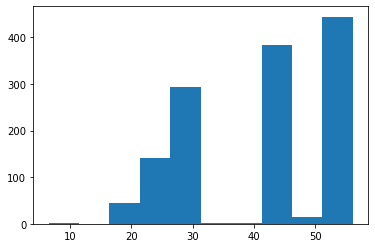

In [44]:
plt.hist( pd.to_numeric(cns_gas_train_data['WH_DR_ELEV_M'].dropna().values[1:], errors='coerce'));

In [45]:
cns_gas_train_data.columns


Index(['Country', 'WELL_NAME', 'OGA Well Name', 'WH_SITETYPE', 'WH_FIELD',
       'WH_BLOCK', 'WH_LAT', 'WH_LONG', 'WH_COORD_SYS', 'WH_OPERATOR',
       'WH_SPUD_DATE', 'WH_SPUD_YEAR', 'WH_COMP_DATE', 'WH_TD_M',
       'WH_DR_ELEV_M', 'WH_DEPTH_REF', 'WH_WATER_DEPTH_M', 'SAMPLE_ID',
       'SH_DEPTH_TOP_FT', 'SH_DEPTH_BOT_FT', 'SH_SAMPLE_TYPE',
       'SH_SAMPLE_SUB_TYPE', 'SH_ORIG', 'SH_ORIG_DESC', 'SH_TREATMENT',
       'SH_TREATMENT_DESC', 'SH_LITH', 'SH_AGE', 'SH_AGE_BOT', 'SH_FORM',
       'SH_FORM_BOT', 'SH_CDATE', 'SH_COMMENT', 'SAMPLE_ID_GM',
       'SAMPLE_ID_GDB', 'SAMPLE_ID_SAM', 'EXT_SAMPLE_VENDOR', 'SAMPLE_ID_EXT',
       'GAS_METHOD', 'GAS_LAB', 'GAS_ACQ_DATE', 'GAS_TOTAL_CONCENTRATION',
       'GAS_AIR', 'GAS_C1', 'GAS_C2', 'C2_UNSAT', 'GAS_C3', 'C3_UNSAT',
       'GAS_IC4', 'GAS_NC4', 'C4_UNSAT', 'GAS_NEOC5', 'GAS_IC5', 'GAS_NC5',
       'C5_UNSAT', 'GAS_NC5_PLUS', 'GAS_C6PLUS', 'GAS_O2', 'GAS_CO2', 'GAS_H2',
       'GAS_H2S', 'GAS_HE', 'GAS_N2', 'D_G_METHOD', 'D_G_LAB'

In [85]:
cns_oil_data = pd.read_csv(cns_oil_data_path)
cns_oil_data


,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,WH_OPERATOR,WH_SPUD_DATE,WH_SPUD_YEAR,WH_COMP_DATE,WH_TD_M,WH_DR_ELEV_M,WH_DEPTH_REF,WH_WATER_DEPTH_M,SAMPLE_ID,SH_DEPTH_TOP_FT,SH_DEPTH_BOT_FT,SH_SAMPLE_TYPE,SH_SAMPLE_SUB_TYPE,SH_ORIG,SH_ORIG_DESC,SH_TREATMENT,SH_TREATMENT_DESC,SH_LITH,SH_AGE,SH_AGE_BOT,SH_FORM,SH_FORM_BOT,SH_CDATE,SH_COMMENT,SAMPLE_ID_GM,SAMPLE_ID_GDB,SAMPLE_ID_SAM,EXT_SAMPLE_VENDOR,SAMPLE_ID_EXT,OIL_PRPH,OIL_PR17,OIL_PH18,PRPH_SAT,PR17_SAT,PH18_SAT,SAT_CPI,SAT_CPI_PH,SAT_CPI_SS,SAT_WAX,OIL_CPI,OIL_CPI_PH,OIL_CPI_SS,OIL_WAX,BENCH,C7MCH,TOLMCH,EVAP,TOL_NC7,NC7_11DMCP,TOL_11DMCP,1T2DMCP_11DMCP,1C2DMCP_11DMCP,2MH_11DMCP,3MH_11DMCP,MCH_BR_MCH,MCH_NC7_MCH,STTR_ISO,STTR_REA,STTR_TRI,STER_ISO,STER_REA,STER_NOR,STCN_C27,STCN_C28,STCN_C29,TRIT_HOP,20SR,C29IN,TSTM,TSTSTM,BB_HOP_IDX,BISNOR_IDX,C29TS_IDX,C31_22S_R,C32_22S_R,DIAHOP_IDX,DIAHOP_TS29_IDX,GAM_IDX,H29_H30_IDX,HOMOHOP_IDX,MORTN_IDX_1,NOR25HOP_IDX,OL_IDX,TS_TM_IDX,TRICYCLIC_IDX,EX_TRI_IDX,EX_TRI_TS_IDX,STER_HOP_IDX,STER_TRI_IDX,TET_IDX,TPP_DSTER_IDX,TPP_HOP_IDX,TPP_STER_IDX,TPP_TRI_IDX,TPP_IDX,C27_20S_R,C29_20S_R,C29_ABB_AAA,DPREG_IDX,DSTER_IDX,DSTER30_IDX,PREG_IDX,STER27_PCT_A,STER28_PCT_A,STER29_PCT_A,STER27_PCT_B,STER28_PCT_B,STER29_PCT_B,STER27_PCT_DIA,STER28_PCT_DIA,STER29_PCT_DIA,STER28_29_A,STER27_29_A,STER28_29_B,STER27_29_B,STER30_IDX_A,STER30R_IDX,SUM_STER,EXT_TRI_IDX,SUM_LMW_TRIS,TET_TR23_IDX,TET_TR26_IDX,TET_TRIS,TR19_21_IDX,TR19_23_IDX,TR23_24_IDX,TR23_H30_IDX,TR26_25_IDX,TR29_30_IDX,ETR_IDX,BNH_TNH_IDX,HOEP,HOEP_S,MORTN_IDX_2,OL_ISOM_IDX,SUM_HOPANES,TS_H31S_IDX,X_H31R_IDX,B_CAR_TRI_IDX,B_CAROT_IDX,DIASTER_HOP,DIASTER_HOP_22S,DIASTER_TRIS,TRIS_HOP_22S,DIAS_ISOM,TET_HOP_22S,TR19_PCT,TR20_PCT,TR21_PCT,TR22_PCT,TR23_PCT,TR24_PCT,TR25_AB,TR25_PCT,TR26_AB,TR26_PCT,TR28_TRI_IDX,TR29_TRI_IDX,TR30_TRI_IDX,NOR25HOP_IDX_2,NOR30HOP_IDX,21_22_SUM_MAS,DIASTER_C27AAA_IDX,C29BBS_BBS_AAR,20_21_SUM_TAS,TRICYCL_STER_IDX,C21_C22_STER,TAS_MAS_TAS,FRAC_C27_MAS,FRAC_C28_MAS,FRAC_C29_MAS,FRAC_C26_TAS,FRAC_C27_TAS,FRAC_C28_TAS,FRAC_C29_TAS,TR_22_21_IDX,FRAC_C27_AAAR,FRAC_C28_AAAR,FRAC_C29_AAAR,C27_C29_ABBS_IDX,C28_C29_ABBS_IDX,MNR,DNR_1,TNR_1,TNR_2,MPI_1,MPI_2,F1,F2,BP_NAPH,DBF_NAPH,DBT_NAPH,ARO_STER_C27,ARO_STER_C28,ARO_STER_C29,TARO_STER_C26,TARO_STER_C27,TARO_STER_C28,META_STER_C27,META_STER_C28,META_STER_C29,C28TA_C29MA_RATIO,MAI_MAII_RATIO,TAI_TAII_RATIO,C27MA_RATIO,TA_C26_C28_RATIO,TA_C27_C28_RATIO,TA_C28_C29_RATIO,META_C29_RATIO,META_C27_RATIO,META_C28_RATIO,TA_DINO_INDEX
0,NaN,Well name,Well name,Site type,Field name,Block name name,Latitude,Longitude,Location CRS,Operator,Spud date,Spud year,Completion date,Target depth (m),Derrick floor elevation (m),Depth reference,Water depth (m),Sample code,Top depth in feet,Base depth in feet,Sample type,Sample origin/sub-type,Sample origin,Sample origin description,Sample treatment,Sample treatment description,Sample lithology,Sample age (top),Sample age (bottom),Formation (top),Formation (bottom),Collection date,Sample comments,Sample code GM,Sample code in GDB,Sample code in SAM,Name external data vendor,Sample code external data vendor,Pristane/phytane (whole oil),Pristane/nC17 (whole oil),Phytane/nC18 (whole oil),Pristane/phytane (saturates),Pristane/nC17 (saturates),Phytane/nC18 (saturates),CPI (saturates)(Bray and Evans),CPI (saturates)(Philippi),"CPI (saturates)(Scalan and Smith, 1970)",Wax ratio (Saturates),CPI (Whole oil)(Bray and Evans),CPI (Whole oil)(Philippi),"CPI (Whole oil)(Scalan and Smith, 1970)",Wax ratio (Whole oil),Benzene/cyclohexane,Heptane/MCH,Toluene/MCH,Evaporation nC6/nC7,toluene/nC7,nC7/11dmcp,toluene/11dmcp,1t2dmcp/11dmcp,1c2dmcp/11dmcp,2MH/11dmcp,3MH/11dmcp,MCH/(Branched c7s + MCH),MCH/(nC7 + MCH),"iso-steranes % (iso-rea-tri, 217+218+259)","rearr.-steranes % (iso-rea-tri, 217+218+259)","triterpanes % (iso-rea-tri, 217+218+259)","iso-steranes % (iso-rea-nor, 217+218+259)","rearr.-steranes % (iso-rea-nor, 217+218+259)","norm.-steranes % iso-rea-nor, 217+21

In [77]:
cns_gas_train_data.columns.values

array(['Country', 'WELL_NAME', 'OGA Well Name', 'WH_SITETYPE', 'WH_FIELD',
       'WH_BLOCK', 'WH_LAT', 'WH_LONG', 'WH_COORD_SYS', 'WH_OPERATOR',
       'WH_SPUD_DATE', 'WH_SPUD_YEAR', 'WH_COMP_DATE', 'WH_TD_M',
       'WH_DR_ELEV_M', 'WH_DEPTH_REF', 'WH_WATER_DEPTH_M', 'SAMPLE_ID',
       'SH_DEPTH_TOP_FT', 'SH_DEPTH_BOT_FT', 'SH_SAMPLE_TYPE',
       'SH_SAMPLE_SUB_TYPE', 'SH_ORIG', 'SH_ORIG_DESC', 'SH_TREATMENT',
       'SH_TREATMENT_DESC', 'SH_LITH', 'SH_AGE', 'SH_AGE_BOT', 'SH_FORM',
       'SH_FORM_BOT', 'SH_CDATE', 'SH_COMMENT', 'SAMPLE_ID_GM',
       'SAMPLE_ID_GDB', 'SAMPLE_ID_SAM', 'EXT_SAMPLE_VENDOR',
       'SAMPLE_ID_EXT', 'GAS_METHOD', 'GAS_LAB', 'GAS_ACQ_DATE',
       'GAS_TOTAL_CONCENTRATION', 'GAS_AIR', 'GAS_C1', 'GAS_C2',
       'C2_UNSAT', 'GAS_C3', 'C3_UNSAT', 'GAS_IC4', 'GAS_NC4', 'C4_UNSAT',
       'GAS_NEOC5', 'GAS_IC5', 'GAS_NC5', 'C5_UNSAT', 'GAS_NC5_PLUS',
       'GAS_C6PLUS', 'GAS_O2', 'GAS_CO2', 'GAS_H2', 'GAS_H2S', 'GAS_HE',
       'GAS_N2', 'D_G_METHOD', 'D

In [82]:
len(set(cns_oil_data.columns.values).intersection(cns_gas_train_data.columns.values))

34

In [76]:
cns_rock_samples.columns.values == cns_oil_data.columns.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [86]:
cns_rock_samples = pd.read_csv(cns_rock_samples_path)
cns_rock_samples

c:\users\z003nxun\appdata\local\continuum\miniconda3\envs\dewa36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,WH_OPERATOR,WH_SPUD_DATE,WH_SPUD_YEAR,WH_COMP_DATE,WH_TD_M,WH_DR_ELEV_M,WH_DEPTH_REF,WH_WATER_DEPTH_M,SAMPLE_ID,SH_DEPTH_TOP_FT,SH_DEPTH_BOT_FT,SH_SAMPLE_TYPE,SH_SAMPLE_SUB_TYPE,SH_ORIG,SH_ORIG_DESC,SH_TREATMENT,SH_TREATMENT_DESC,SH_LITH,EPOCH_TOP,EPOCH_BASE,AGE_TOP,AGE_BASE,GROUP,FORMATION,MEMBER,UNIT,SH_CDATE,SH_COMMENT,SAMPLE_ID_GM,SAMPLE_ID_GDB,SAMPLE_ID_SAM,EXT_SAMPLE_VENDOR,SAMPLE_ID_EXT,TOC_METHOD,TOC_LAB,TOC_ACQ_DATE,TOC,RP_METHOD,RP_LAB,RP_ACQ_DATE,REV_TOTS1,REV_TOTS2,REV_TOTS3,REV_TMAX,H_INDEX,O_INDEX,P_INDEX,MAC_LAB,MAC_METHOD,MAC_DATE,MAC_SEMIQUAN,MAC_SOM_LB_DENS,MAC_SOM_LB_LAYERS,MAC_SOM_LB_LENS,MAC_SOM_NLB_DIFF,MAC_VIT,MAC_VIT_1_TELOCOL_LAYERS,MAC_VIT_1_TELOCOL_DETR,MAC_VIT_1_TELIN_LAYERS,MAC_VIT_1_TELIN_DETR,MAC_VIT_2_DESMOCOL_LAYERS,MAC_VIT_2_DESMOCOL_DETR,MAC_LIPT,MAC_LIPT_SPORINITE_MICRO,MAC_LIPT_SPORINITE_MEGA,MAC_LIPT_CUTIN,MAC_LIPT_SUBER,MAC_LIPT_RESIN,MAC_LIPT_LIPTO,MAC_LIPT_ALG_BOTR,MAC_LIPT_ALG_TASM,MAC_LIPT_ALG_OTHR,MAC_LIPT_ALG_MICR_PLANC,MAC_LIPT_EXSUDAT_FL,MAC_LIPT_EXSUDAT_NON_FL,MAC_INERT,MAC_INERT_SCLER,MAC_INERT_FUSIN,MAC_INERT_MICRIN,MAC_MINERAL_UNDEF,MAC_MINERAL_PYR_FRAM,MAC_MINERAL_PYR_AGG_CRYST,VR_JOB_DATE,VR_METH,VR_MACERAL,VR_NR_OB,VR_MIN,VR_MAX,VR_MEAN,VR_ST,VR_QUAL,SULF_METHOD,SULF_LAB,SULF_ACQ_DATE,SUL
0,NaN,Well name,Well name,Site type,Field name,Block name name,Latitude,Longitude,Location CRS,Operator,Spud date,Spud year,Completion date,Target depth (m),Derrick floor elevation (m),Depth reference,Water depth (m),Sample code,Top depth in feet,Base depth in feet,Sample type,Sample origin/sub-type,Sample origin,Sample origin description,Sample treatment,Sample treatment description,Sample lithology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Collection date,Sample comments,Sample code GM,Sample code in GDB,Sample code in SAM,Name external data vendor,Sample code external data vendor,Method used,Laboratory,Acquisition date,TOC (wt%),Method used,Laboratory,Acquisition date,Distillable HC mg/g (S1),Pyrolizable HC mg/g (S2),Organic CO2 mg/g (S3),Tmax (degrees C),Hydrogen index,Oxygen index,Production index,Data vendor,Method used,Analysis date,Semi-quatitative description,SOM loadbearing dense (%),SOM loadbearing layers (%),SOM loadbearing lenses (%),SOM non-loadbearing diffuse/intergranular (%),Vitrinite (%),Vitrinite-1 telocollinite layers/lenses (%),Vitrinite-1 telocollinite detrital (%),Vitrinite-1 telinite layers/lenses (%),Vitrinite-1 telinite detrital,Vitrinite-2 desmocollinite layers/lenses (%),Vitrinite-2 desmocollinite detrital (%),Liptinite (%),Liptinite sporinite (micro-) (%),Liptinite sporinite (mega-) (%),Liptinite cutinite (%),Liptinite suberinite (%),Liptinite resinite (%),Liptinite liptodetrinite (%),Liptinite algae botryococcus (%),Liptinite algae tasmanites (%),Liptinite algae other (%),Liptinite algae microplankton (%),Liptinite exsudatinite (fluorescing) (%),"Liptinite exsudatinite (non-fluorescing), soli...",Inertinite (%),Inert sclerotinite (%),Inert (semi-) fusinite (+inertodetrinite) (%),Inert micrinite,Undefined minerals,framboidal pyrite,Aggregates/crystals pyrite,Vendor date of service,Method,Maceral,Nr observations,Minimum value,Maximunm value,Mean value,Standard deviation,Quality,Method used,Laboratory,Acquisition date,Sulphur (wt%)
1,United Kingdom,014/19-27S1,14/19- 27Z,WELL,NaN,014/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXPRO_10287,13820.01,13850,Rock,Cuttings,PICK,NaN,ASIS,Hand picked sample,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1016669,NaN,NaN,NaN,LECO,RTS,01-Jan-00,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,014/19-27S1,14/19- 27Z,WELL,NaN,014/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXPRO_10350,9470.01,9500,Rock,Cuttings,NaN,NaN,ASIS,NaN,NaN,NaN,NaN

In [49]:
y_cols = ['GAS_C1', 'GAS_C2', 'GAS_C3', 'GAS_IC4', 'GAS_NC4', 'GAS_IC5', 'GAS_NC5']

In [148]:
def to_num(vals):
    return pd.to_numeric(vals, errors='coerce')

In [147]:
coords = cns_gas_train_data[(cns_gas_train_data['WH_COORD_SYS'].str.upper() == 'WORLD GEODETIC SYSTEM 1984') ][['WH_TD_M', 'WH_DR_ELEV_M','WH_LAT', 'WH_LONG']+y_cols]
coords = coords.apply(to_num).dropna(subset=['WH_LAT', 'WH_LONG'])

In [150]:
coords

,WH_TD_M,WH_DR_ELEV_M,WH_LAT,WH_LONG,GAS_C1,GAS_C2,GAS_C3,GAS_IC4,GAS_NC4,GAS_IC5,GAS_NC5
30,4407.4082,43.8912,56.736665,2.306140,78.88,10.68,4.79,0.58,1.190,0.180,0.200
31,3971.8487,24.9936,56.731516,2.324318,84.69,8.30,2.99,0.51,0.940,0.230,0.240
32,3971.8487,24.9936,56.731516,2.324318,83.66,8.40,3.17,0.58,1.110,0.310,0.360
33,5012.4358,21.3360,56.808485,2.074547,79.00,9.06,4.15,0.51,1.250,0.320,0.420
34,5012.4358,21.3360,56.808485,2.074547,79.86,7.97,3.35,0.42,0.980,0.240,0.320
...,...,...,...,...,...,...,...,...,...,...,...
1704,2386.5841,26.5176,58.063688,-0.820298,92.30,1.44,1.17,0.40,0.114,0.047,0.024
1706,2177.7959,26.3652,58.036853,-0.891146,87.70,6.50,2.60,0.36,0.760,0.154,0.191
1707,2147.9256,26.5176,58.019424,-0.912446,87.70,6.50,2.60,0.37,0.810,0.171,0.210
1708,3116.5799,24.9939,58.367536,-0.081898,61.41,6.72,5.82,0.59,1.540,0.260,0.290


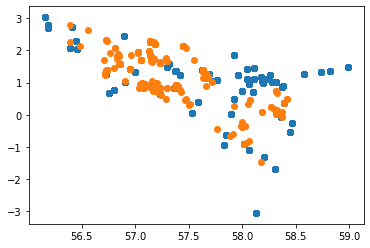

In [56]:

plt.scatter(field_prod_data['Y'], field_prod_data['X'])
plt.scatter(coords['WH_LAT'], coords['WH_LONG'])

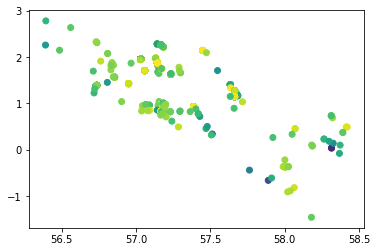

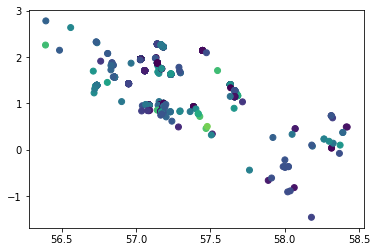

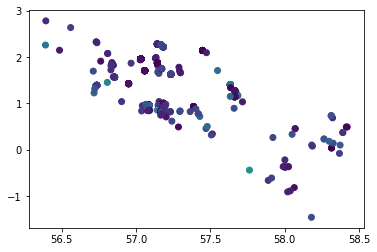

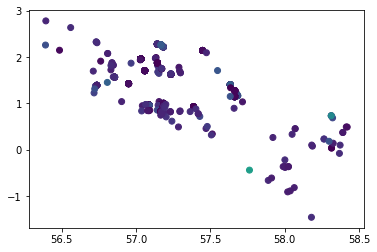

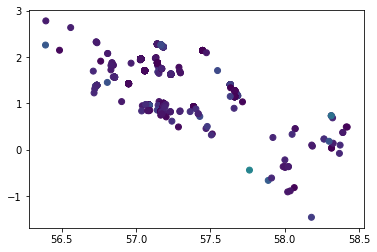

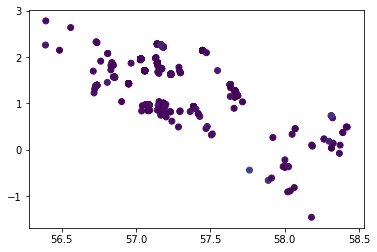

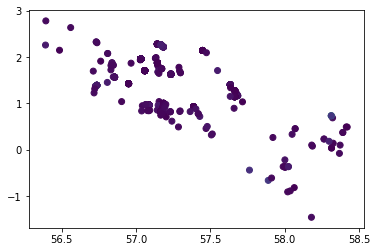

In [46]:
for pred_col in y_cols:
    plt.figure()
    plt.scatter(coords['WH_LAT'], coords['WH_LONG'], c=coords[pred_col])

In [69]:
X = coords[['WH_LAT', 'WH_LONG']]
y = coords[y_cols]

In [104]:
neigh = KNeighborsRegressor(n_neighbors=1000)
neigh.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1000, p=2,
                    weights='uniform')

In [105]:
scores = cross_val_score(neigh, X, y['GAS_C1'], cv=5, scoring='neg_mean_absolute_error')
scores

array([ -8.78467713, -14.00417606, -10.93194864,  -8.73160673,
       -10.89245723])

In [106]:
np.mean(scores)

-10.668973160120071

In [95]:
from sklearn.dummy import DummyRegressor

In [96]:
reg = DummyRegressor()

In [97]:
scores = cross_val_score(reg, X, y['GAS_C1'], cv=5, scoring='neg_mean_absolute_error')
scores

array([ -9.00682111, -14.03035282, -11.389285  ,  -8.81581846,
       -10.8872684 ])

In [98]:
np.mean(scores)

-10.825909158588036

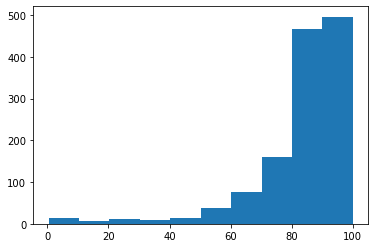

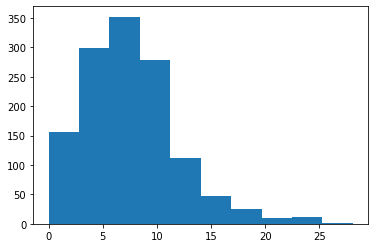

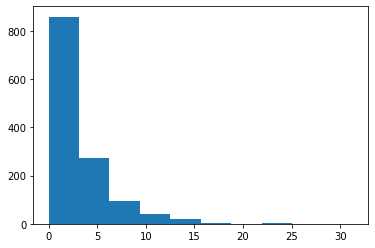

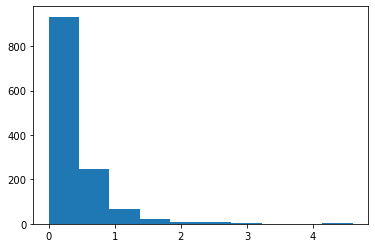

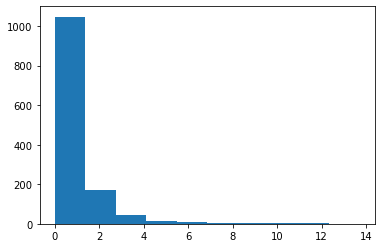

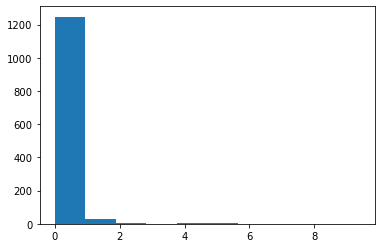

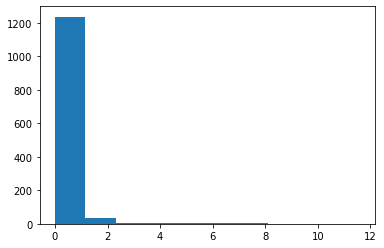

In [341]:
for pred_col in y_cols:
    plt.figure()
    plt.hist(y[pred_col]);

In [107]:
import gmplot

In [108]:
gmap1 = gmplot.GoogleMapPlotter(30.3164945, 
                                78.03219179999999, 13 ) 
  

In [111]:
gmap1.draw('coords.html')

In [2]:
from ipyleaflet import Map, basemaps, basemap_to_tiles

m = Map(center=(52.204793, 360.121558), zoom=9)

In [2]:
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [3]:
from ipyleaflet import Map, basemaps, basemap_to_tiles

m = Map(center=(52.204793, 360.121558), zoom=9)



In [4]:
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [166]:
cns_gas_train_data

,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,WH_OPERATOR,WH_SPUD_DATE,WH_SPUD_YEAR,WH_COMP_DATE,WH_TD_M,WH_DR_ELEV_M,WH_DEPTH_REF,WH_WATER_DEPTH_M,SAMPLE_ID,SH_DEPTH_TOP_FT,SH_DEPTH_BOT_FT,SH_SAMPLE_TYPE,SH_SAMPLE_SUB_TYPE,SH_ORIG,SH_ORIG_DESC,SH_TREATMENT,SH_TREATMENT_DESC,SH_LITH,SH_AGE,SH_AGE_BOT,SH_FORM,SH_FORM_BOT,SH_CDATE,SH_COMMENT,SAMPLE_ID_GM,SAMPLE_ID_GDB,SAMPLE_ID_SAM,EXT_SAMPLE_VENDOR,SAMPLE_ID_EXT,GAS_METHOD,GAS_LAB,GAS_ACQ_DATE,GAS_TOTAL_CONCENTRATION,GAS_AIR,GAS_C1,GAS_C2,C2_UNSAT,GAS_C3,C3_UNSAT,GAS_IC4,GAS_NC4,C4_UNSAT,GAS_NEOC5,GAS_IC5,GAS_NC5,C5_UNSAT,GAS_NC5_PLUS,GAS_C6PLUS,GAS_O2,GAS_CO2,GAS_H2,GAS_H2S,GAS_HE,GAS_N2,D_G_METHOD,D_G_LAB,D_G_DATA_TYPE,D_G_ACQ_DATE,CSIA_CONC_C1,CSIA_NC1,CSIA_NC2,CSIA_NC3,CSIA_IC4,CSIA_NC4,CSIA_NEOC5,CSIA_IC5,CSIA_NC5,CSIA_ETHENE,CSIA_PROPENE,DC_G_CO2,DO_G_CO2,DS_G_H2S,DD_G_H2,DN_G_N2,DD_G_GAS,DD_G_NC1,DD_G_NC2,DD_G_NC3,DD_G_IC4,DD_G_NC4,DD_G_IC5,DD_G_NC5
0,NaN,Well name,Well name,Site type,Field name,Block name,Latitude,Longitude,Location CRS,Operator,Spud date,Spud year,Completion date,Target depth (m),Derrick floor elevation (m),Depth reference,Water depth (m),Sample code,Top depth in feet,Base depth in feet,Sample type,Sample origin/sub-type,Sample origin,Sample origin description,Sample treatment,Sample treatment description,Sample lithology,Sample age (top),Sample age (bottom),Formation (top),Formation (bottom),Collection date,Sample comments,Sample code GM,Sample code in GDB,Sample code in SAM,Name external data vendor,Sample code external data vendor,Method used,Laboratory,Acquisition date,Total gas concentration (ppm),Air in original sample Mol%,Methane air free Mol%,Ethane air free Mol%,C2 unsaturated air free Mol%,Propane air free Mol%,C3 unsaturated air free Mol%,Iso butane air free Mol%,Normal butane air free Mol%,C4 unsaturated air free Mol%,Neo pentane %,Iso pentane air free Mol%,Normal pentane air free Mol%,C5 unsaturated air free Mol%,C5+ fraction air free Mol%,C6+ fraction air free Mol%,Oxygen,CO2 air free Mol%,Hydrogen air free Mol%,H2S air free Mol%,HE air free Mol%,Nitrogen air free Mol%,Method used,Laboratory,Data type,Acquisition date,vol% C1,dC13 nC1,dC13 nC2,dC13 nC3,dC13 iC4,dC13 nC4,dC13 neopentane,dC13 iC5,dC13 nC5,ethene,propene,dC13 CO2,dO18 CO2,dS34 H2S,dDeuterium on H2,dN15 N2,dDeuterium total GAS,dDeuterium nC1,dDeuterium nC2,dDeuterium nC3,dDeuterium iC4,dDeuterium nC4,dDeuterium iC5,dDeuterium nC5
1,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXPRO_41219,9814,12360,Gas,Subsurface,SEPR,NaN,ASIS,NaN,NaN,NaN,NaN,SELE,NaN,30-03-16 0:00,1379-C1-F,NaN,NaN,NaN,NaN,NaN,Air corrected,ISOLAB,23-05-16 0:00,NaN,0.069,75.5,11.4,0.0019,6.1,0.0008,1,2.1,NaN,0.0085,0.51,0.53,NaN,NaN,0.5,NaN,1.8,0,0,NaN,0.56,CSIA,ISOLAB,per mil,23-05-16 0:00,NaN,-42.1,-28.8,-28.2,-29,-28.5,NaN,-28.2,-28.7,NaN,NaN,-7.7,NaN,NaN,NaN,-4,NaN,-187,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXPRO_41220,9814,12360,Gas,Subsurface,SEPR,NaN,ASIS,NaN,NaN,NaN,NaN,SELE,NaN,30-03-16 0:00,A2442,NaN,NaN,NaN,NaN,NaN,Air corrected,ISOLAB,23-05-16 0:00,NaN,0.021,75.4,11.2,0.0017,6.1,0.0007,1.1,2.2,NaN,0.0087,0.54,0.57,NaN,NaN,0.58,NaN,1.8,0,0,NaN,0.57,CSIA,ISOLAB,per mil,23-05-16 0:00,NaN,-42.1,-28.8,-28.2,-29,-28.5,NaN,-28.2,-28.7,NaN,NaN,-7.6,NaN,NaN,NaN,-3.7,NaN,-187,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXPRO_41223,5400,5400,Gas,Subsurface,ISOT,NaN,ASIS,NaN,NaN,NaN,NaN,Lark,NaN,09-02-16 0:00,Gas% 0.5,NaN,NaN,NaN,NaN,NaN,Air corrected,ISOLAB,24-05-16 0:00,NaN,NaN,99.8,0.14,NaN,0.029,NaN,0.0043,0.0026,NaN,NaN,0.0046,0.0055,NaN,NaN,NaN,NaN,0.037,NaN,NaN,NaN,NaN,CSIA,ISOLAB,per mil,24-05-16 0:00,1.7,-70.8,-35.5,-26.1,-26,-27,NaN,-29,-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,U

In [345]:
coords = cns_gas_train_data[(cns_gas_train_data['WH_COORD_SYS'].str.upper() == 'WORLD GEODETIC SYSTEM 1984') ][['GAS_METHOD', 'WH_TD_M', 'WH_DR_ELEV_M','WH_LAT', 'WH_LONG']+y_cols]


In [346]:
coords = coords.apply(to_num).dropna(subset=['WH_LAT', 'WH_LONG'])

In [204]:
coords.dropna(inplace=True)
X = coords[['WH_LAT', 'WH_LONG', 'WH_TD_M', 'WH_DR_ELEV_M']]
y = coords[y_cols]

In [205]:
X.shape

(0, 4)

In [182]:
from sklearn.ensemble import RandomForestRegressor

In [183]:
reg= RandomForestRegressor(n_estimators=100, min_samples_leaf=10)

In [184]:
scores = cross_val_score(reg, X, y['GAS_C1'], cv=10, scoring='neg_mean_absolute_error')
scores

array([ -8.51492885, -15.95387477, -12.04830305, -14.556542  ,
        -4.14380135,  -3.43128603,  -9.01765004,  -9.16128896,
       -10.77164283, -13.86066234])

In [185]:
np.mean(scores)

-10.14599802131994

In [190]:
from sklearn import preprocessing


In [646]:
coords = cns_gas_train_data[(cns_gas_train_data['WH_COORD_SYS'].str.upper() == 'WORLD GEODETIC SYSTEM 1984') ][['SH_SAMPLE_SUB_TYPE', 'WH_SITETYPE', 'SH_ORIG',  'WH_OPERATOR',  'GAS_LAB', 'SH_DEPTH_TOP_FT', 'SH_DEPTH_BOT_FT', 'GAS_METHOD', 'WH_TD_M', 'WH_DR_ELEV_M','WH_LAT', 'WH_LONG']+y_cols]
coords

,SH_SAMPLE_SUB_TYPE,WH_SITETYPE,SH_ORIG,WH_OPERATOR,GAS_LAB,SH_DEPTH_TOP_FT,SH_DEPTH_BOT_FT,GAS_METHOD,WH_TD_M,WH_DR_ELEV_M,WH_LAT,WH_LONG,GAS_C1,GAS_C2,GAS_C3,GAS_IC4,GAS_NC4,GAS_IC5,GAS_NC5
30,Unspecified,WELL,NaN,PHILLIPS,RTS,9864.01,9885.01,UNKNOWN,4407.4082,43.8912,56.73666472,2.306139742,78.88,10.68,4.79,0.58,1.19,0.18,0.2
31,Unspecified,WELL,NaN,PHILLIPS,RTS,11558.01,11575.98,UNKNOWN,3971.8487,24.9936,56.73151615,2.324318126,84.69,8.3,2.99,0.51,0.94,0.23,0.24
32,Unspecified,WELL,NaN,PHILLIPS,RTS,11652,11669,UNKNOWN,3971.8487,24.9936,56.73151615,2.324318126,83.66,8.4,3.17,0.58,1.11,0.31,0.36
33,Unspecified,WELL,NaN,SHELL,KSEPL,9300,9320,Air corrected,5012.4358,21.336,56.80848482,2.07454697,79,9.06,4.15,0.51,1.25,0.32,0.42
34,Unspecified,WELL,NaN,SHELL,KSEPL,9660,9700,Air corrected,5012.4358,21.336,56.80848482,2.07454697,79.86,7.97,3.35,0.42,0.98,0.24,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,Subsurface,WELL,MDT,ARCO,RTS,6542,6542,Air corrected,2177.7959,26.3652,58.03685295,World Geodetic System 1984,87.4,6.5,2.7,0.39,0.83,0.18,0.23
1706,Subsurface,WELL,MDT,ARCO,RTS,6542,6542,Air corrected,2177.7959,26.3652,58.03685295,-0.891146243,87.7,6.5,2.6,0.36,0.76,0.154,0.191
1707,Unspecified,WELL,NaN,ARCO,RTS,6458,6508,Air corrected,2147.9256,26.5176,58.01942425,-0.912446013,87.7,6.5,2.6,0.37,0.81,0.171,0.21
1708,Unspecified,WELL,NaN,TEXACO,RTS,9447.01,9464.01,UNKNOWN,3116.5799,24.9939,58.36753631,-0.081898178,61.41,6.72,5.82,0.59,1.54,0.26,0.29


In [647]:
coords=coords.dropna()

In [648]:
# 1. INSTANTIATE

cat_features = ['GAS_METHOD', 'WH_OPERATOR', 'GAS_LAB', 'SH_SAMPLE_SUB_TYPE', 'WH_SITETYPE', 'SH_ORIG']

for cat in cat_features:
    cat_values = coords[cat].str.upper().copy()
    coords = coords.drop([cat],axis=1)
    coords[ cat] = cat_values
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(coords[cat_features])

# 3. Transform
onehotlabels = enc.transform(coords[cat_features]).toarray()
onehotlabels = pd.DataFrame(onehotlabels, columns=enc.get_feature_names(cat_features))
onehotlabels

,GAS_METHOD_AIR CORRECTED,GAS_METHOD_NOT AIR CORRECTED,GAS_METHOD_NOT CORRECTED,GAS_METHOD_UNKNOWN,WH_OPERATOR_AMERADA HESS,WH_OPERATOR_ARCO,WH_OPERATOR_BP,WH_OPERATOR_CENTRICA,WH_OPERATOR_PETRO-CANADA,WH_OPERATOR_SHELL,WH_OPERATOR_SHELL UK LTD,WH_OPERATOR_VENTURE,GAS_LAB_ABE_PC_LAB,GAS_LAB_ISOLAB,GAS_LAB_ISO_LAB,GAS_LAB_KSEPL,GAS_LAB_RTS,SH_SAMPLE_SUB_TYPE_HEADSPACE,SH_SAMPLE_SUB_TYPE_MUDGAS,SH_SAMPLE_SUB_TYPE_SUBSURFACE,SH_SAMPLE_SUB_TYPE_SURFACE,SH_SAMPLE_SUB_TYPE_UNSPECIFIED,WH_SITETYPE_FIELD,WH_SITETYPE_WELL,SH_ORIG_ANUL,SH_ORIG_DST,SH_ORIG_HEAD,SH_ORIG_ISOT,SH_ORIG_MDT,SH_ORIG_ROV,SH_ORIG_SEPR,SH_ORIG_UNKN
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1223,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1224,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1225,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [649]:
np.sum(np.isnan(pd.to_datetime(cns_gas_train_data[(cns_gas_train_data['WH_COORD_SYS'].str.upper() == 'WORLD GEODETIC SYSTEM 1984')]['SH_CDATE'], errors='coerce').dt.year))

261

In [650]:
# coords['SH_CDATE'] = pd.to_datetime(coords['SH_CDATE']).dt.year

In [651]:
coords = coords[['SH_DEPTH_TOP_FT', 'SH_DEPTH_BOT_FT', 'WH_TD_M', 'WH_DR_ELEV_M','WH_LAT', 'WH_LONG']+y_cols].apply(to_num)

In [652]:
coords =coords.reset_index(drop=True)

In [653]:
coords = pd.concat([coords, onehotlabels], axis=1)
coords

,SH_DEPTH_TOP_FT,SH_DEPTH_BOT_FT,WH_TD_M,WH_DR_ELEV_M,WH_LAT,WH_LONG,GAS_C1,GAS_C2,GAS_C3,GAS_IC4,GAS_NC4,GAS_IC5,GAS_NC5,GAS_METHOD_AIR CORRECTED,GAS_METHOD_NOT AIR CORRECTED,GAS_METHOD_NOT CORRECTED,GAS_METHOD_UNKNOWN,WH_OPERATOR_AMERADA HESS,WH_OPERATOR_ARCO,WH_OPERATOR_BP,WH_OPERATOR_CENTRICA,WH_OPERATOR_PETRO-CANADA,WH_OPERATOR_SHELL,WH_OPERATOR_SHELL UK LTD,WH_OPERATOR_VENTURE,GAS_LAB_ABE_PC_LAB,GAS_LAB_ISOLAB,GAS_LAB_ISO_LAB,GAS_LAB_KSEPL,GAS_LAB_RTS,SH_SAMPLE_SUB_TYPE_HEADSPACE,SH_SAMPLE_SUB_TYPE_MUDGAS,SH_SAMPLE_SUB_TYPE_SUBSURFACE,SH_SAMPLE_SUB_TYPE_SURFACE,SH_SAMPLE_SUB_TYPE_UNSPECIFIED,WH_SITETYPE_FIELD,WH_SITETYPE_WELL,SH_ORIG_ANUL,SH_ORIG_DST,SH_ORIG_HEAD,SH_ORIG_ISOT,SH_ORIG_MDT,SH_ORIG_ROV,SH_ORIG_SEPR,SH_ORIG_UNKN
0,14085.0,14190.0,4456.1761,22.8600,56.711616,1.693739,70.60,14.60,6.80,0.520,1.600,0.200,0.290,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,13586.0,13702.0,4401.3120,27.4320,56.806225,1.450216,54.57,16.21,13.71,1.410,3.530,0.790,0.890,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,14100.0,14100.0,4346.4480,25.9080,56.735544,1.387799,82.00,10.00,4.60,0.390,1.400,0.410,0.740,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,13923.0,13923.0,4346.4480,25.9080,56.735544,1.387799,82.00,9.90,4.70,0.410,1.500,0.440,0.810,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,13398.0,13398.0,4346.4480,25.9080,56.735544,1.387799,83.00,10.00,4.30,0.360,1.200,0.390,0.700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,9520.0,9520.0,3026.6641,25.2984,57.512373,0.337646,35.20,2.20,0.84,0.165,0.350,0.155,0.200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1223,9120.0,9213.0,2947.7143,25.2984,57.506124,0.315860,68.30,12.70,5.90,0.630,1.720,0.350,0.370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1224,6412.0,6498.0,2386.5841,26.5176,58.063688,-0.820298,92.30,1.44,1.17,0.400,0.114,0.047,0.024,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1225,6542.0,6542.0,2177.7959,26.3652,58.036853,NaN,87.40,6.50,2.70,0.390,0.830,0.180,0.230,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [654]:
coords =coords.dropna()
coords = coords[(coords['SH_DEPTH_TOP_FT']>0)&(coords['SH_DEPTH_BOT_FT']>0)]
coords

,SH_DEPTH_TOP_FT,SH_DEPTH_BOT_FT,WH_TD_M,WH_DR_ELEV_M,WH_LAT,WH_LONG,GAS_C1,GAS_C2,GAS_C3,GAS_IC4,GAS_NC4,GAS_IC5,GAS_NC5,GAS_METHOD_AIR CORRECTED,GAS_METHOD_NOT AIR CORRECTED,GAS_METHOD_NOT CORRECTED,GAS_METHOD_UNKNOWN,WH_OPERATOR_AMERADA HESS,WH_OPERATOR_ARCO,WH_OPERATOR_BP,WH_OPERATOR_CENTRICA,WH_OPERATOR_PETRO-CANADA,WH_OPERATOR_SHELL,WH_OPERATOR_SHELL UK LTD,WH_OPERATOR_VENTURE,GAS_LAB_ABE_PC_LAB,GAS_LAB_ISOLAB,GAS_LAB_ISO_LAB,GAS_LAB_KSEPL,GAS_LAB_RTS,SH_SAMPLE_SUB_TYPE_HEADSPACE,SH_SAMPLE_SUB_TYPE_MUDGAS,SH_SAMPLE_SUB_TYPE_SUBSURFACE,SH_SAMPLE_SUB_TYPE_SURFACE,SH_SAMPLE_SUB_TYPE_UNSPECIFIED,WH_SITETYPE_FIELD,WH_SITETYPE_WELL,SH_ORIG_ANUL,SH_ORIG_DST,SH_ORIG_HEAD,SH_ORIG_ISOT,SH_ORIG_MDT,SH_ORIG_ROV,SH_ORIG_SEPR,SH_ORIG_UNKN
0,14085.0,14190.0,4456.1761,22.8600,56.711616,1.693739,70.60,14.60,6.80,0.520,1.600,0.200,0.290,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,13586.0,13702.0,4401.3120,27.4320,56.806225,1.450216,54.57,16.21,13.71,1.410,3.530,0.790,0.890,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,14100.0,14100.0,4346.4480,25.9080,56.735544,1.387799,82.00,10.00,4.60,0.390,1.400,0.410,0.740,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,13923.0,13923.0,4346.4480,25.9080,56.735544,1.387799,82.00,9.90,4.70,0.410,1.500,0.440,0.810,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,13398.0,13398.0,4346.4480,25.9080,56.735544,1.387799,83.00,10.00,4.30,0.360,1.200,0.390,0.700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,12185.0,12275.0,3880.1041,21.0312,57.428361,0.715269,56.20,20.10,10.30,0.960,3.000,0.510,0.680,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1222,9520.0,9520.0,3026.6641,25.2984,57.512373,0.337646,35.20,2.20,0.84,0.165,0.350,0.155,0.200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1223,9120.0,9213.0,2947.7143,25.2984,57.506124,0.315860,68.30,12.70,5.90,0.630,1.720,0.350,0.370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1224,6412.0,6498.0,2386.5841,26.5176,58.063688,-0.820298,92.30,1.44,1.17,0.400,0.114,0.047,0.024,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [655]:
X_cols = [col for col in coords if col not in y_cols]

In [656]:
X_cols

['SH_DEPTH_TOP_FT',
 'SH_DEPTH_BOT_FT',
 'WH_TD_M',
 'WH_DR_ELEV_M',
 'WH_LAT',
 'WH_LONG',
 'GAS_METHOD_AIR CORRECTED',
 'GAS_METHOD_NOT AIR CORRECTED',
 'GAS_METHOD_NOT CORRECTED',
 'GAS_METHOD_UNKNOWN',
 'WH_OPERATOR_AMERADA HESS',
 'WH_OPERATOR_ARCO',
 'WH_OPERATOR_BP',
 'WH_OPERATOR_CENTRICA',
 'WH_OPERATOR_PETRO-CANADA',
 'WH_OPERATOR_SHELL',
 'WH_OPERATOR_SHELL UK LTD',
 'WH_OPERATOR_VENTURE',
 'GAS_LAB_ABE_PC_LAB',
 'GAS_LAB_ISOLAB',
 'GAS_LAB_ISO_LAB',
 'GAS_LAB_KSEPL',
 'GAS_LAB_RTS',
 'SH_SAMPLE_SUB_TYPE_HEADSPACE',
 'SH_SAMPLE_SUB_TYPE_MUDGAS',
 'SH_SAMPLE_SUB_TYPE_SUBSURFACE',
 'SH_SAMPLE_SUB_TYPE_SURFACE',
 'SH_SAMPLE_SUB_TYPE_UNSPECIFIED',
 'WH_SITETYPE_FIELD',
 'WH_SITETYPE_WELL',
 'SH_ORIG_ANUL',
 'SH_ORIG_DST',
 'SH_ORIG_HEAD',
 'SH_ORIG_ISOT',
 'SH_ORIG_MDT',
 'SH_ORIG_ROV',
 'SH_ORIG_SEPR',
 'SH_ORIG_UNKN']

In [657]:
X=coords[X_cols]
y=coords[y_cols]

In [658]:
reg= RandomForestRegressor(n_estimators=100, min_samples_leaf=10)

In [659]:
scores = cross_val_score(reg, X, y['GAS_C1'], cv=10, n_jobs=6, scoring='neg_mean_absolute_error')
scores

array([ -9.93598981, -12.99201469,  -9.3103944 ,  -8.90100588,
        -4.64536538,  -4.75234356, -10.07722318,  -8.32699381,
        -9.83066945, -11.81218011])

In [660]:
np.mean(scores)

-9.058418027586471

In [661]:
from sklearn.model_selection import LeavePOut

In [662]:
lpo = LeavePOut(1)

In [663]:
scores = cross_val_score(reg, X, y['GAS_C1'], cv=lpo, n_jobs=6, scoring='neg_mean_absolute_error')
scores

array([ -6.77025036, -15.28710305,  -2.64431958, ...,  -2.76395107,
       -12.45438459,  -3.79556733])

In [664]:
np.mean(scores)

-5.430947702059899

In [665]:
np.std(scores)

7.932283273074281

In [668]:
forest = RandomForestRegressor(n_estimators=100, min_samples_leaf=10)

In [669]:
forest.fit(X,  y['GAS_C1'])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_cols[f], importances[indices[f]]))

Feature ranking:
1. SH_DEPTH_TOP_FT (0.195303)
2. SH_DEPTH_BOT_FT (0.150190)
3. WH_TD_M (0.136463)
4. WH_DR_ELEV_M (0.129331)
5. WH_LAT (0.100531)
6. WH_LONG (0.095412)
7. GAS_METHOD_AIR CORRECTED (0.083000)
8. GAS_METHOD_NOT AIR CORRECTED (0.045731)
9. GAS_METHOD_NOT CORRECTED (0.041929)
10. GAS_METHOD_UNKNOWN (0.010189)
11. WH_OPERATOR_AMERADA HESS (0.008496)
12. WH_OPERATOR_ARCO (0.001275)
13. WH_OPERATOR_BP (0.000695)
14. WH_OPERATOR_CENTRICA (0.000497)
15. WH_OPERATOR_PETRO-CANADA (0.000496)
16. WH_OPERATOR_SHELL (0.000345)
17. WH_OPERATOR_SHELL UK LTD (0.000098)
18. WH_OPERATOR_VENTURE (0.000020)
19. GAS_LAB_ABE_PC_LAB (0.000000)
20. GAS_LAB_ISOLAB (0.000000)
21. GAS_LAB_ISO_LAB (0.000000)
22. GAS_LAB_KSEPL (0.000000)
23. GAS_LAB_RTS (0.000000)
24. SH_SAMPLE_SUB_TYPE_HEADSPACE (0.000000)
25. SH_SAMPLE_SUB_TYPE_MUDGAS (0.000000)
26. SH_SAMPLE_SUB_TYPE_SUBSURFACE (0.000000)
27. SH_SAMPLE_SUB_TYPE_SURFACE (0.000000)
28. SH_SAMPLE_SUB_TYPE_UNSPECIFIED (0.000000)
29. WH_SITETYPE_FIELD

In [644]:
# X_cols=['SH_DEPTH_TOP_FT','SH_DEPTH_BOT_FT','WH_TD_M','WH_DR_ELEV_M','WH_LAT','WH_LONG','GAS_METHOD_Air corrected','GAS_METHOD_Not air corrected','GAS_METHOD_Not corrected','GAS_METHOD_UNKNOWN','WH_OPERATOR_AMERADA HESS','WH_OPERATOR_AMOCO','WH_OPERATOR_ARCO']

In [670]:
# X=coords[X_cols]
# y=coords[y_cols]

In [672]:
scores = cross_val_score(reg, X, y['GAS_C1'], cv=lpo, n_jobs=6, scoring='neg_mean_absolute_error')
scores

In [585]:
np.mean(scores)

-6.1385694028932845

In [586]:
np.std(scores)

8.713287505837007

(array([  4.,   3.,   2.,   4.,  10.,  19.,  28.,  44., 142., 843.]),
 array([-6.24045584e+01, -5.61641468e+01, -4.99237352e+01, -4.36833236e+01,
        -3.74429120e+01, -3.12025004e+01, -2.49620888e+01, -1.87216772e+01,
        -1.24812656e+01, -6.24085402e+00, -4.42426844e-04]),
 <a list of 10 Patch objects>)

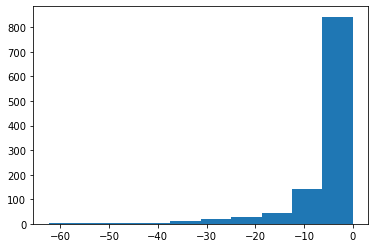

In [673]:
plt.hist(scores)

In [674]:
X.iloc[np.where(np.array(scores)< -50)[0], :]

,SH_DEPTH_TOP_FT,SH_DEPTH_BOT_FT,WH_TD_M,WH_DR_ELEV_M,WH_LAT,WH_LONG,GAS_METHOD_AIR CORRECTED,GAS_METHOD_NOT AIR CORRECTED,GAS_METHOD_NOT CORRECTED,GAS_METHOD_UNKNOWN,WH_OPERATOR_AMERADA HESS,WH_OPERATOR_ARCO,WH_OPERATOR_BP,WH_OPERATOR_CENTRICA,WH_OPERATOR_PETRO-CANADA,WH_OPERATOR_SHELL,WH_OPERATOR_SHELL UK LTD,WH_OPERATOR_VENTURE,GAS_LAB_ABE_PC_LAB,GAS_LAB_ISOLAB,GAS_LAB_ISO_LAB,GAS_LAB_KSEPL,GAS_LAB_RTS,SH_SAMPLE_SUB_TYPE_HEADSPACE,SH_SAMPLE_SUB_TYPE_MUDGAS,SH_SAMPLE_SUB_TYPE_SUBSURFACE,SH_SAMPLE_SUB_TYPE_SURFACE,SH_SAMPLE_SUB_TYPE_UNSPECIFIED,WH_SITETYPE_FIELD,WH_SITETYPE_WELL,SH_ORIG_ANUL,SH_ORIG_DST,SH_ORIG_HEAD,SH_ORIG_ISOT,SH_ORIG_MDT,SH_ORIG_ROV,SH_ORIG_SEPR,SH_ORIG_UNKN
167,14089.00,14089.00,5650.0776,42.7939,57.031604,1.953816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
168,12735.00,12735.00,5650.0776,42.7939,57.031604,1.953816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
169,12697.80,12697.80,5650.0776,42.7939,57.031604,1.953816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
170,15544.50,15544.50,5650.0776,42.7939,57.031604,1.953816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
413,0.01,0.01,5623.5600,43.2816,57.031577,1.953858,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444,14830.50,14830.50,5437.6322,43.2816,57.031569,1.953741,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1198,13354.00,13354.00,4602.4801,43.5864,57.386027,0.921278,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [676]:
y.iloc[np.where(np.array(scores)< -50)[0], :]

,GAS_C1,GAS_C2,GAS_C3,GAS_IC4,GAS_NC4,GAS_IC5,GAS_NC5
167,0.86,0.045,0.0086,0.0008,0.0014,0.0002,0.0002
168,1.20,0.060,0.0110,0.0011,0.0017,0.0003,0.0003
169,0.53,0.033,0.0069,0.0007,0.0012,0.0002,0.0003
170,2.60,0.170,0.0370,0.0044,0.0077,0.0021,0.0020
413,2.30,0.170,0.0660,0.0100,0.0200,0.0060,0.0060
444,3.70,1.100,0.8900,0.1900,0.5200,0.2000,0.2700
1198,20.30,24.300,31.3000,3.5000,13.7000,2.4000,4.5000


In [678]:
np.mean(np.array(scores)[np.array(scores)> -50])

-5.108577983555109

In [ ]:
plt.hist(y['GAS_C1'])

In [443]:
np.sum(X['SH_DEPTH_TOP_FT']<X['SH_DEPTH_BOT_FT'])

120

In [479]:
np.sum(np.isnan())

298

In [472]:
import datetime

In [475]:
datetime.datetime.strptime('30-03-16 0:00', '%d-%m-%y %H:%M')

datetime.datetime(2016, 3, 30, 0, 0)

In [679]:
df =cns_gas_train_data

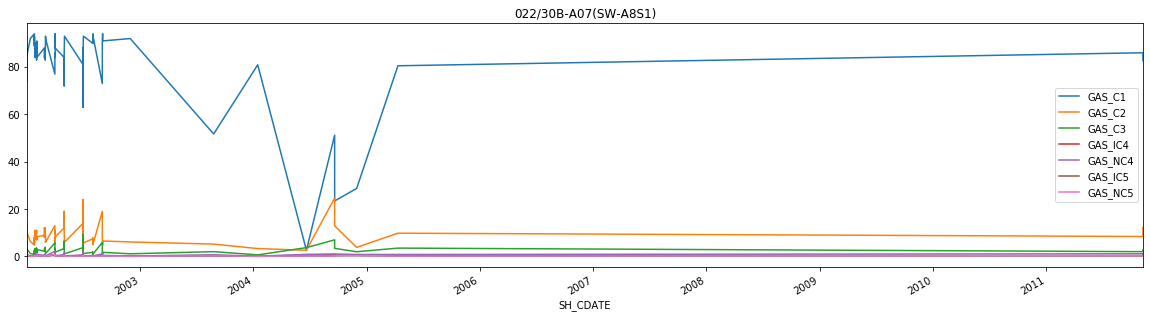

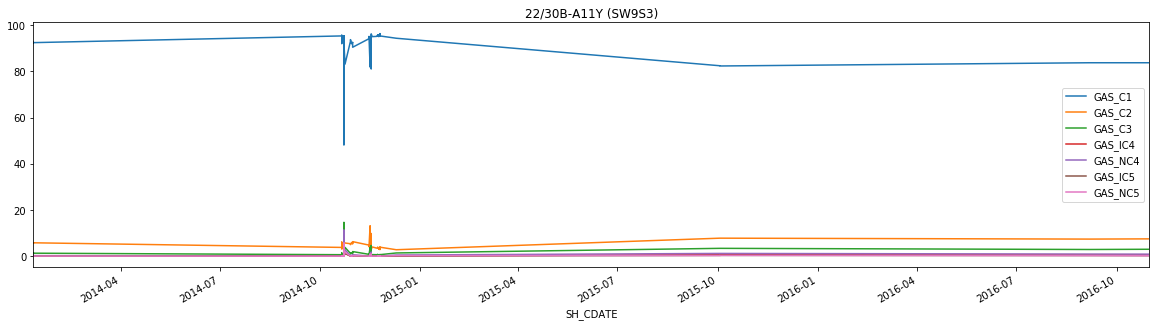

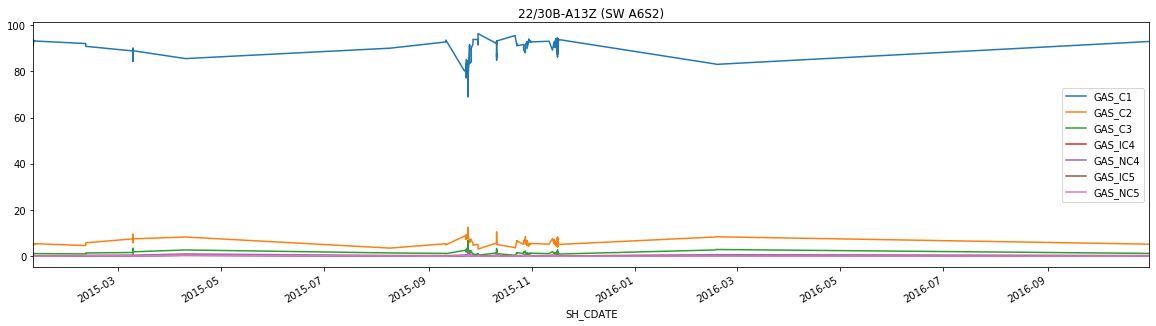

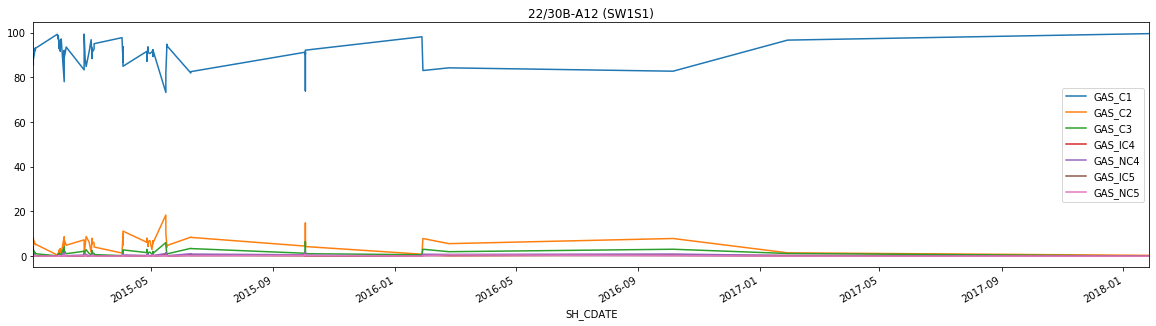

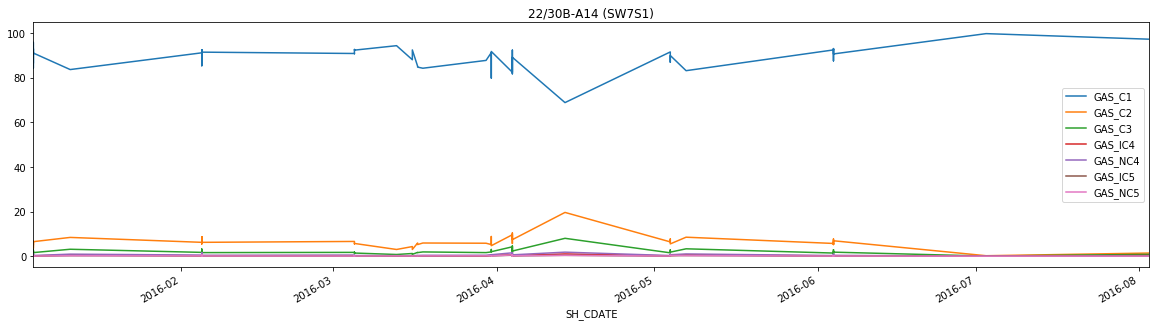

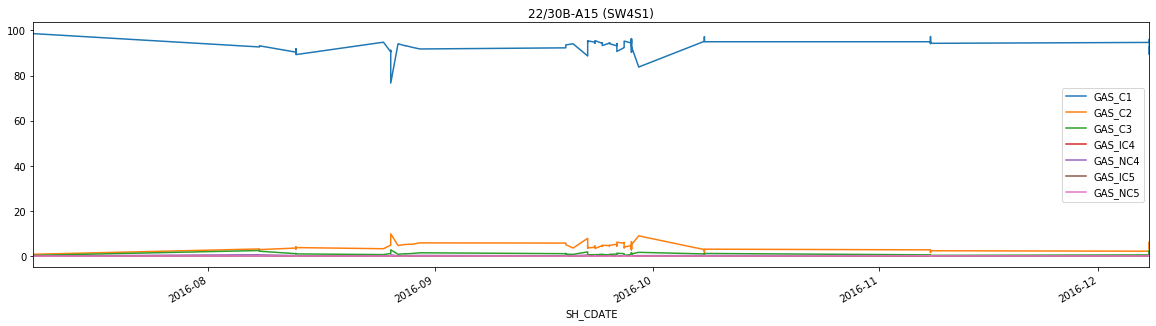

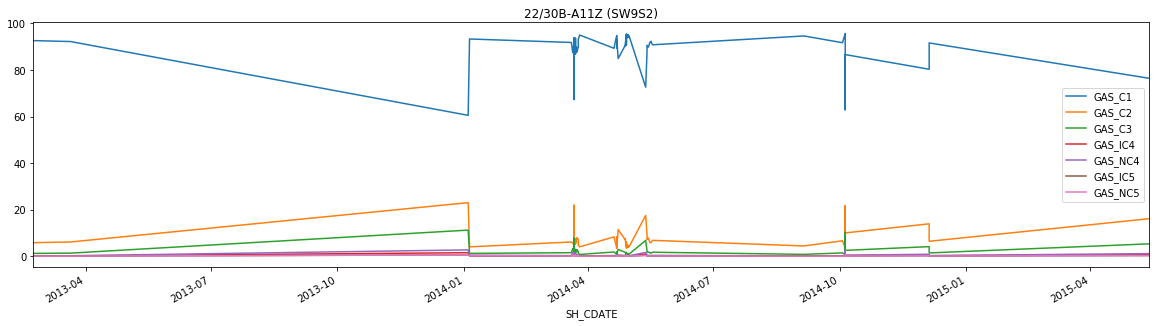

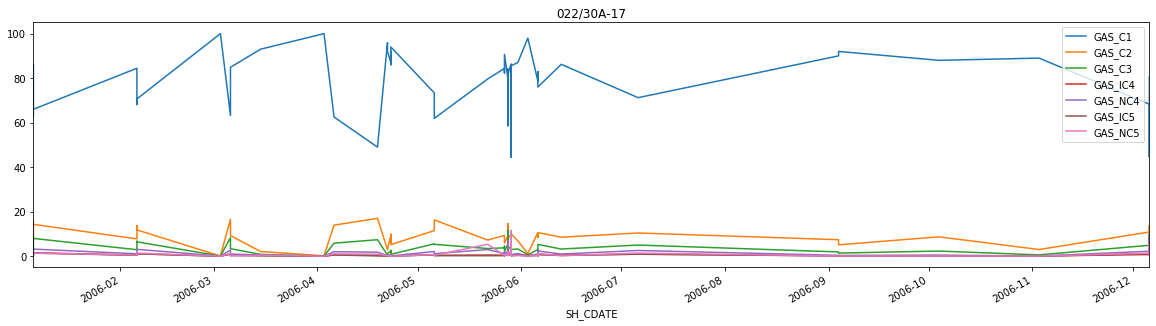

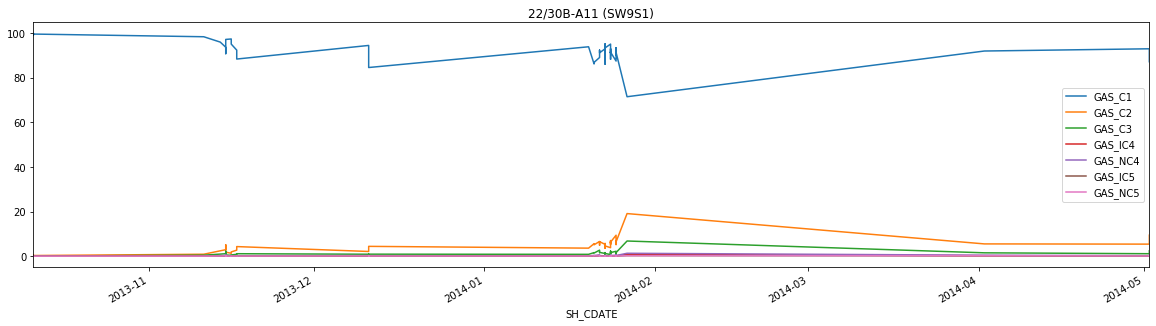

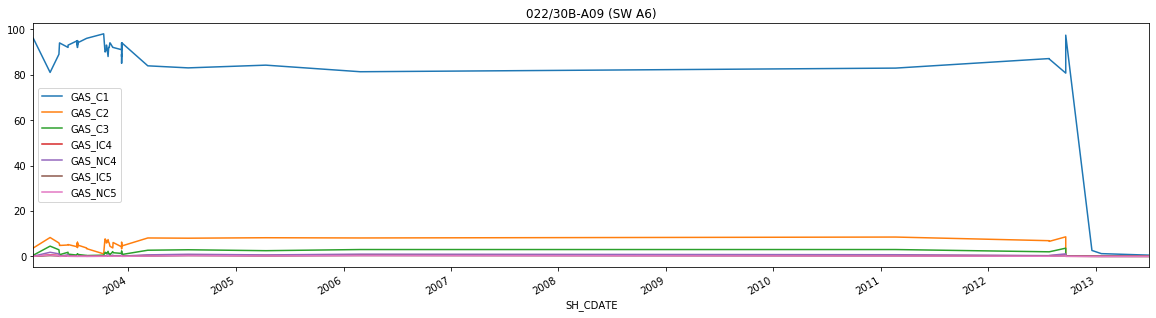

In [680]:
for name in df['WELL_NAME'].value_counts()[:10].index:
    plt.figure(figsize=(20, 5))
    plt.title(name)
    for y in y_cols:
        well = df[df['WELL_NAME'] == name].copy()
        well = well[~well['SH_CDATE'].isnull()]
        well['SH_CDATE'] = pd.to_datetime(well['SH_CDATE'])
        well = well.set_index('SH_CDATE')
        well[y].astype(float).plot()
        plt.legend()